In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#df = pd.read_csv('Datos.csv', encoding='ISO-8859-1')
df = pd.read_csv('data/delitos.csv')

In [20]:
#Ejercicio 1
#Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

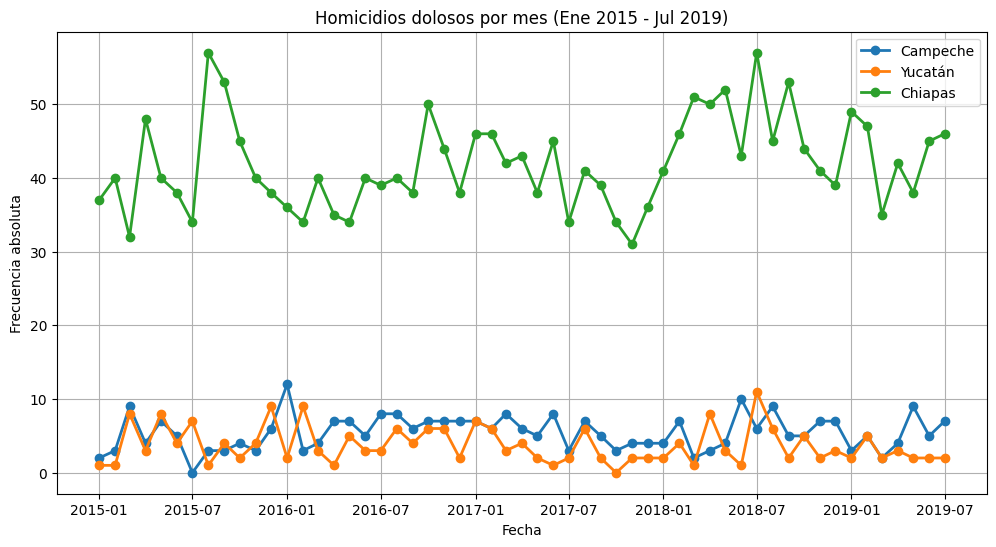

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Leer CSV ---
df = pd.read_csv('data/delitos.csv', encoding='ISO-8859-1')

# --- Filtrar solo homicidios dolosos ---
homicidios = df[df['subtipo_de_delito'] == 'Homicidio doloso']

# --- Elegir 3 estados ---
estados_seleccionados = [4, 31, 7]  # Campeche, Yucatán, Chiapas
clave_a_nombre = {4: 'Campeche', 31: 'Yucatán', 7: 'Chiapas'}

# --- Filtrar solo esos estados ---
homicidios_sel = homicidios[homicidios['clave_ent'].isin(estados_seleccionados)]

# --- Columnas de meses ---
meses = ['enero','febrero','marzo','abril','mayo','junio','julio','agosto',
         'septiembre','octubre','noviembre','diciembre']

# --- Sumar homicidios por estado y año (sin mezclar años) ---
frecuencia_total = homicidios_sel.groupby(['clave_ent','anio'])[meses].sum().reset_index()

# --- Convertir a formato largo (una fila por estado, año y mes) ---
homicidios_melt = frecuencia_total.melt(
    id_vars=['clave_ent','anio'],
    value_vars=meses,
    var_name='Mes',
    value_name='Frecuencia'
)

# --- Mapear nombre de estado ---
homicidios_melt['Estado'] = homicidios_melt['clave_ent'].map(clave_a_nombre)

# --- Crear columna de fecha usando año y número de mes ---
meses_dict = {mes:i+1 for i, mes in enumerate(meses)}
homicidios_melt['Mes_num'] = homicidios_melt['Mes'].map(meses_dict)
homicidios_melt['Fecha'] = pd.to_datetime(
    homicidios_melt['anio'].astype(str) + '-' + homicidios_melt['Mes_num'].astype(str) + '-01'
)

# --- Filtrar hasta julio 2019 ---
homicidios_melt = homicidios_melt[homicidios_melt['Fecha'] <= '2019-07-31']

# --- Ordenar por estado y fecha ---
homicidios_melt = homicidios_melt.sort_values(['Estado','Fecha']).reset_index(drop=True)

# --- Graficar serie de tiempo ---
plt.figure(figsize=(12,6))
for clave in estados_seleccionados:
    data = homicidios_melt[homicidios_melt['clave_ent'] == clave]
    plt.plot(data['Fecha'], data['Frecuencia'], marker='o', label=clave_a_nombre[clave], linewidth=2)

plt.title('Homicidios dolosos por mes (Ene 2015 - Jul 2019)')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia absoluta')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
#Ejercicio 2: Contetas las siguientes preguntas:
#2.1.-¿Cuántos homicidios dolosos hubo en Colima en el 2018?
import pandas as pd

# Leer CSV
df = pd.read_csv('data/delitos.csv', encoding='ISO-8859-1')

# Filtrar homicidios dolosos de Colima en 2018
colima_2018 = df[
    (df['subtipo_de_delito'] == 'Homicidio doloso') &
    (df['entidad'] == 'Colima') &
    (df['anio'] == 2018)
]

# Columnas de meses
meses = ['enero','febrero','marzo','abril','mayo','junio','julio',
         'agosto','septiembre','octubre','noviembre','diciembre']

# Sumar homicidios de todos los meses y todos los subtipos
total_homicidios = colima_2018[meses].sum().sum()

print(f"Homicidios dolosos en Colima en 2018: {total_homicidios}")


Homicidios dolosos en Colima en 2018: 617.0


In [86]:
#2.2.-Cuantos robos de vehículo automotor ha habido en el 2019?
import pandas as pd

# --- Leer CSV ---
df = pd.read_csv('data/delitos.csv', encoding='ISO-8859-1')

# --- Correción ---
df['tipo_de_delito'] = df['tipo_de_delito'].str.encode('latin1').str.decode('utf-8', errors='ignore')
df['subtipo_de_delito'] = df['subtipo_de_delito'].str.encode('latin1').str.decode('utf-8', errors='ignore')

# --- Filtrar todos los estados y año 2019 ---
filtro = (
    (df['tipo_de_delito'] == 'Robo') &
    (df['subtipo_de_delito'] == 'Robo de vehículo automotor') &
    (df['anio'] == 2019)
)

df_filtrado = df[filtro]

# --- Columnas de meses ---
meses = [
    'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
    'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'
]

# --- Sumar robos de vehículo automotor en todo el país ---
total_robos = df_filtrado[meses].sum().sum()

print(f"Robos de vehículo automotor en México en 2019: {total_robos}")


robos_por_estado = df_filtrado.groupby('entidad')[meses].sum().sum(axis=1)
total = robos_por_estado.sum()
print("\nRobos de vehículo automotor por estado en 2019:")
print(robos_por_estado)
print('El total de robos es de:          ',total)


Robos de vehículo automotor en México en 2019: 187661.0

Robos de vehículo automotor por estado en 2019:
entidad
Aguascalientes                      2399.0
Baja California                    13995.0
Baja California Sur                  832.0
Campeche                             627.0
Chiapas                             2334.0
Chihuahua                           4787.0
Ciudad de MÃ©xico                  12952.0
Coahuila de Zaragoza                 729.0
Colima                              1239.0
Durango                              958.0
Guanajuato                          4538.0
Guerrero                            3251.0
Hidalgo                             4259.0
Jalisco                            19907.0
MichoacÃ¡n de Ocampo                7035.0
Morelos                             3285.0
MÃ©xico                            47498.0
Nayarit                              412.0
Nuevo LeÃ³n                         1460.0
Oaxaca                              3101.0
Puebla                     

In [87]:
#2.3.-Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
import pandas as pd

# --- Leer CSV con codificación correcta ---
df = pd.read_csv('data/delitos.csv', encoding='ISO-8859-1')

# --- Corregir carácteres ---
for col in ['tipo_de_delito', 'subtipo_de_delito']:
    df[col] = df[col].str.encode('latin1').str.decode('utf-8', errors='ignore')

# --- Filtrar solo los delitos de interés ---
delitos_filtro = df[
    df['subtipo_de_delito'].isin(['Homicidio doloso', 'Feminicidio'])
]

# --- Columnas de meses ---
meses = [
    'enero','febrero','marzo','abril','mayo','junio',
    'julio','agosto','septiembre','octubre','noviembre','diciembre'
]

# --- Sumar cada mes y total por año ---
suma_anual = (
    delitos_filtro.groupby(['anio', 'subtipo_de_delito'])[meses]
    .sum()
    .sum(axis=1)
    .reset_index(name='Total')
)

# --- Resultado ---
print("\nSuma de homicidios dolosos y feminicidios por año en México:\n")
print(suma_anual)

# --- El total ---
totales_por_anio = suma_anual.groupby('anio')['Total'].sum().reset_index()
print("\nTotal combinado (Homicidios + Feminicidios) por año:\n")
print(totales_por_anio)



Suma de homicidios dolosos y feminicidios por año en México:

    anio subtipo_de_delito    Total
0   2015       Feminicidio    413.0
1   2015  Homicidio doloso  16119.0
2   2016       Feminicidio    608.0
3   2016  Homicidio doloso  20147.0
4   2017       Feminicidio    745.0
5   2017  Homicidio doloso  25032.0
6   2018       Feminicidio    903.0
7   2018  Homicidio doloso  29092.0
8   2019       Feminicidio    947.0
9   2019  Homicidio doloso  29498.0
10  2020       Feminicidio    947.0
11  2020  Homicidio doloso  28839.0
12  2021       Feminicidio    984.0
13  2021  Homicidio doloso  28279.0
14  2022       Feminicidio    963.0
15  2022  Homicidio doloso  26282.0
16  2023       Feminicidio    831.0
17  2023  Homicidio doloso  25307.0
18  2024       Feminicidio    821.0
19  2024  Homicidio doloso  25463.0
20  2025       Feminicidio    501.0
21  2025  Homicidio doloso  15673.0

Total combinado (Homicidios + Feminicidios) por año:

    anio    Total
0   2015  16532.0
1   2016  20755.0


In [88]:
#2.4.-En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios? 
#He realizado estado en vez de municipio
import pandas as pd

# --- Leer CSV ---
df = pd.read_csv('data/delitos.csv', encoding='ISO-8859-1')

# --- Corregir problemas de codificación ---
for col in ['tipo_de_delito', 'subtipo_de_delito']:
    df[col] = df[col].str.encode('latin1').str.decode('utf-8', errors='ignore')

# --- Filtrar solo feminicidios ---
feminicidios = df[df['subtipo_de_delito'] == 'Feminicidio']

# --- Columnas de meses ---
meses = [
    'enero','febrero','marzo','abril','mayo','junio',
    'julio','agosto','septiembre','octubre','noviembre','diciembre'
]

# --- Agrupar por entidad y municipio (si tienes columna de municipio, reemplaza 'entidad' por 'municipio') y sumar meses ---
# Aquí uso 'entidad' porque tu CSV no muestra municipio, si tienes otra columna usa esa
fem_por_entidad_mes = feminicidios.groupby('entidad')[meses].sum().reset_index()

# --- Convertir a formato largo para identificar el mes con más feminicidios ---
fem_melt = fem_por_entidad_mes.melt(
    id_vars=['entidad'],
    value_vars=meses,
    var_name='Mes',
    value_name='Frecuencia'
)

# --- Obtener la fila con la mayor frecuencia ---
max_fem = fem_melt.loc[fem_melt['Frecuencia'].idxmax()]

print("El mayor número de feminicidios ocurrió en:")
print(f"Entidad: {max_fem['entidad']}")
print(f"Mes: {max_fem['Mes']}")
print(f"Cantidad de feminicidios: {int(max_fem['Frecuencia'])}")


El mayor número de feminicidios ocurrió en:
Entidad: MÃ©xico
Mes: agosto
Cantidad de feminicidios: 104


In [89]:
#2.5.-¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?
import pandas as pd

# --- Leer CSV ---
df = pd.read_csv('data/delitos.csv', encoding='ISO-8859-1')

# --- Filtrar solo feminicidios ---
feminicidios = df[df['subtipo_de_delito'] == 'Feminicidio']

# --- Columnas de meses ---
meses = [
    'enero','febrero','marzo','abril','mayo','junio',
    'julio','agosto','septiembre','octubre','noviembre','diciembre'
]

# --- Agrupar por entidad y año, sumar por mes ---
fem_por_entidad_anio = feminicidios.groupby(['entidad','anio'])[meses].sum().reset_index()

# --- Convertir a formato largo ---
fem_melt = fem_por_entidad_anio.melt(
    id_vars=['entidad','anio'],
    value_vars=meses,
    var_name='Mes',
    value_name='Frecuencia'
)


max_fem = fem_melt.loc[fem_melt['Frecuencia'].idxmax()]

print("El mayor número de feminicidios ocurrió en:")
print(f"Entidad: {max_fem['entidad']}")
print(f"Año: {max_fem['anio']}")
print(f"Mes: {max_fem['Mes']}")
print(f"Cantidad de feminicidios: {int(max_fem['Frecuencia'])}")


El mayor número de feminicidios ocurrió en:
Entidad: MÃ©xico
Año: 2020
Mes: julio
Cantidad de feminicidios: 19


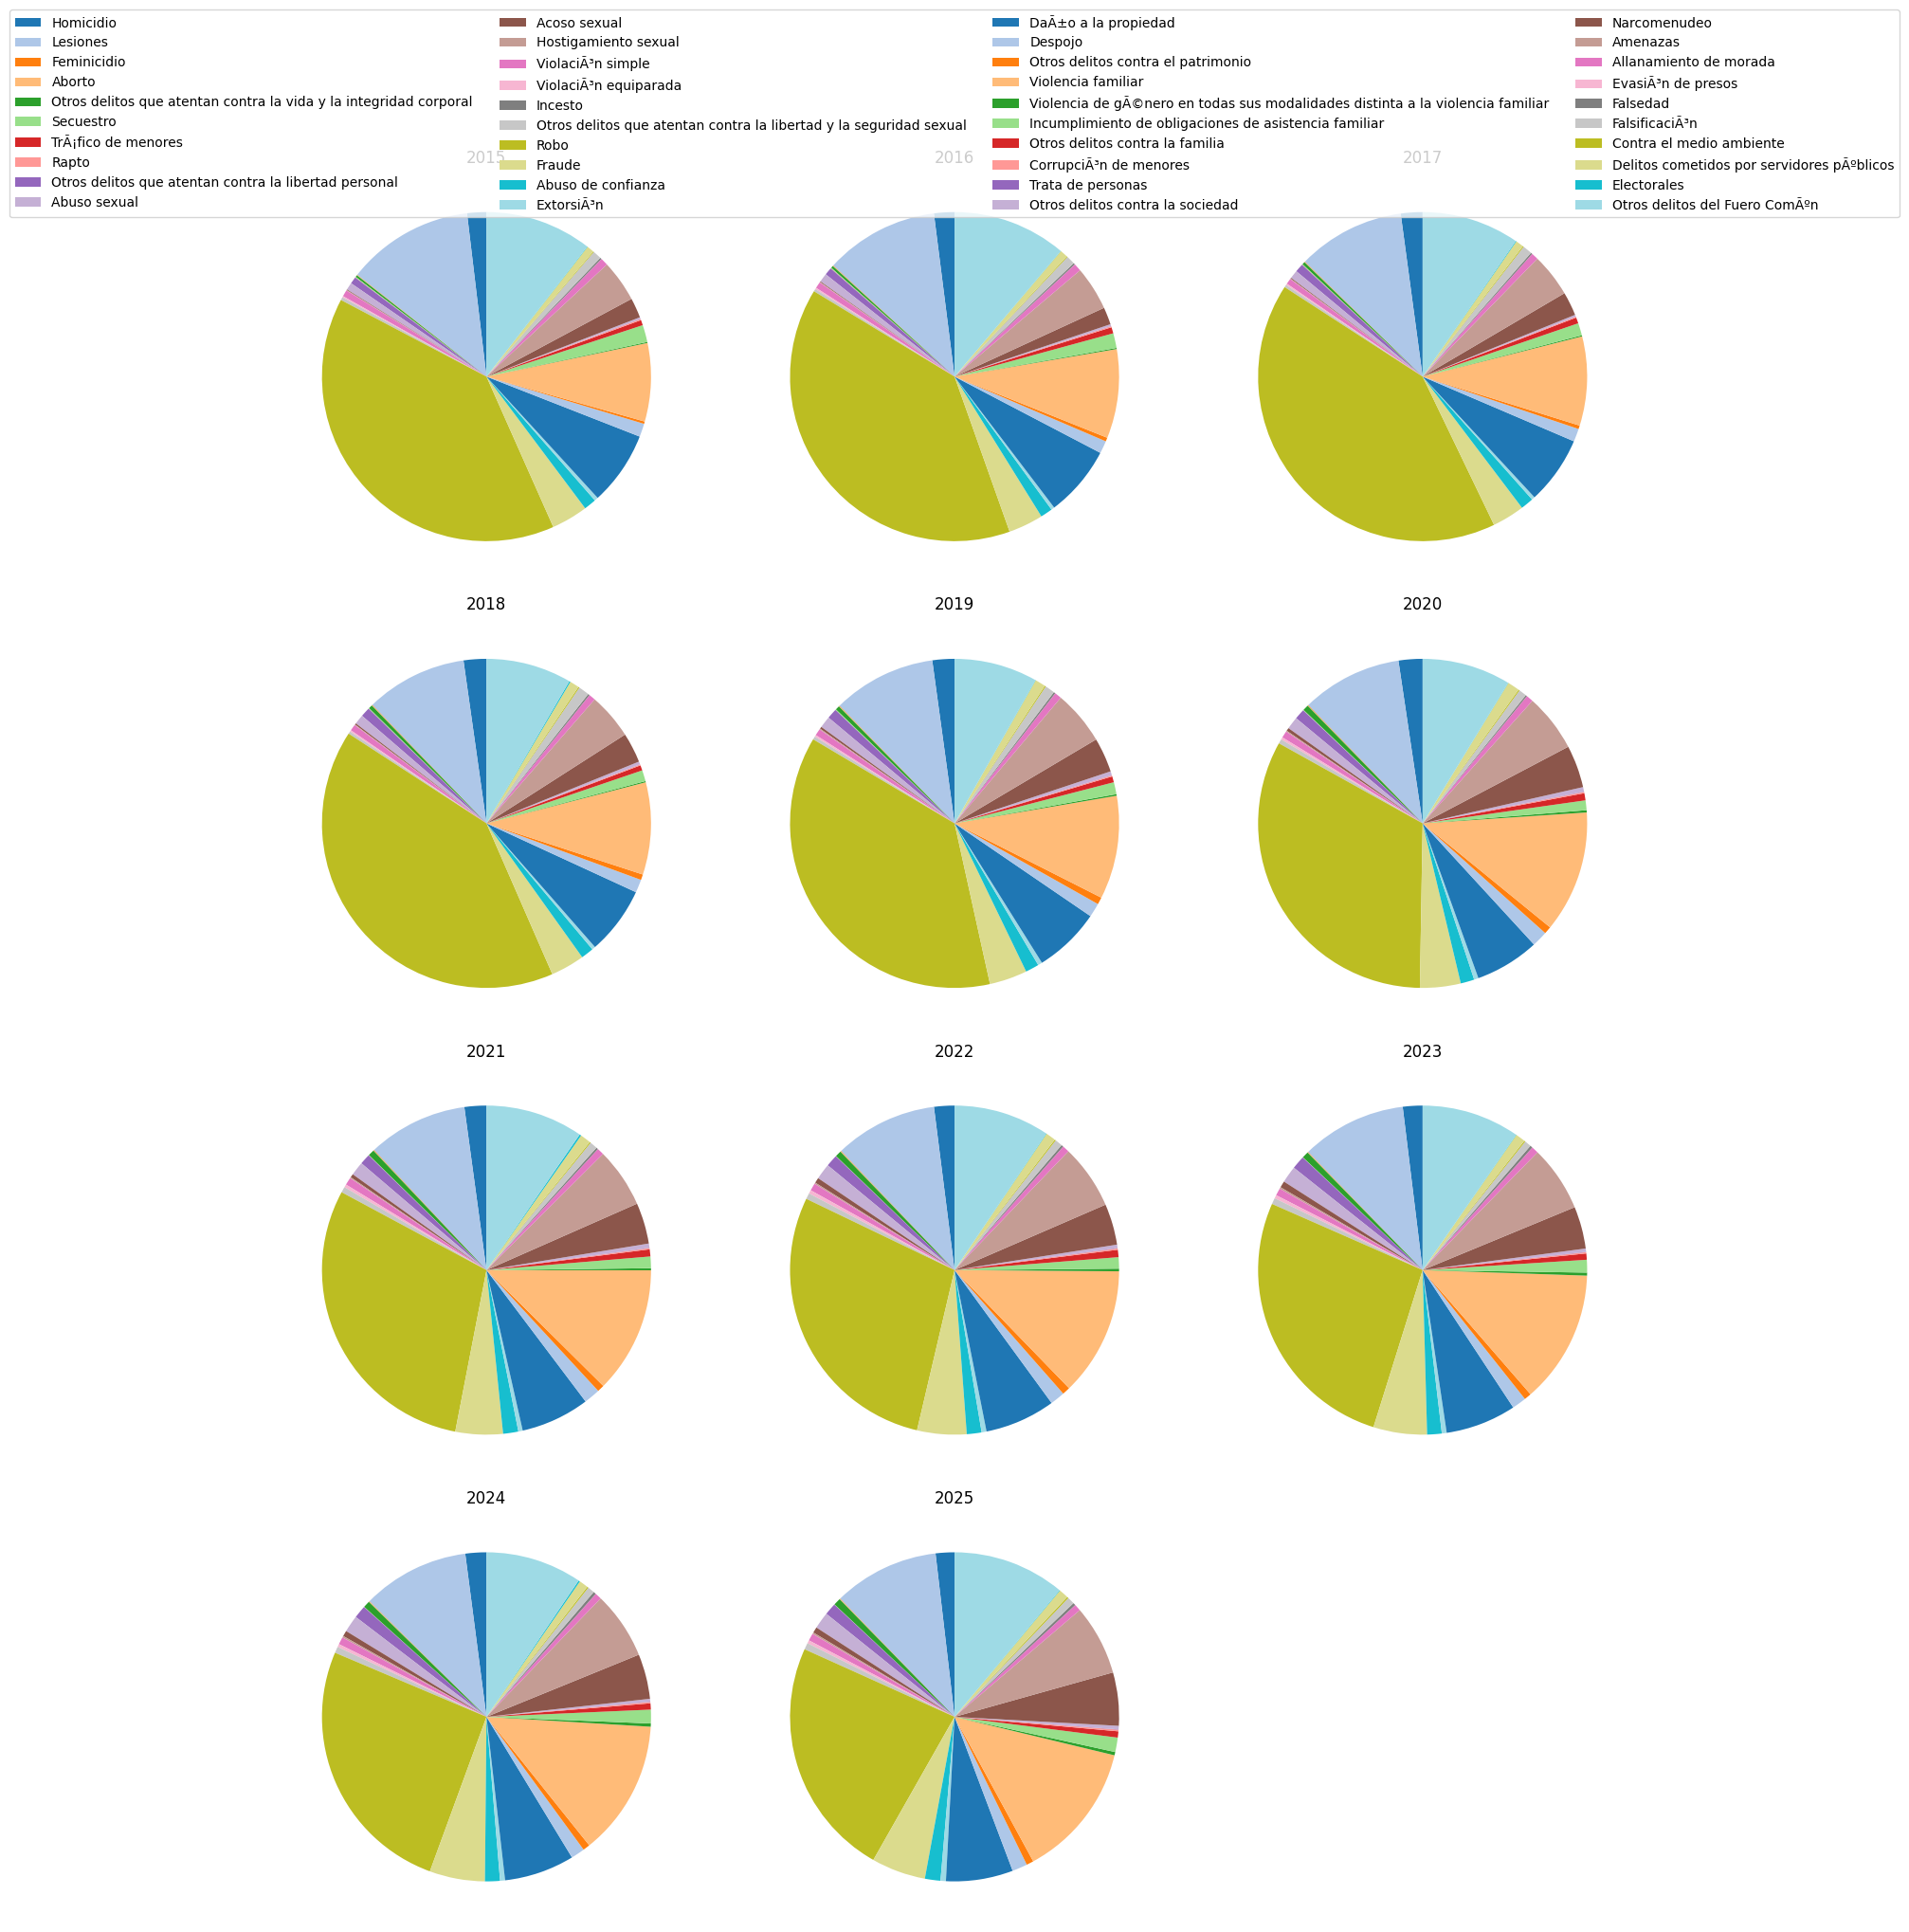

In [93]:
#Ejercicio 3
# Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# --- Leer CSV ---
df = pd.read_csv('data/delitos.csv', encoding='ISO-8859-1')

# --- Columnas de meses ---
meses = ['enero','febrero','marzo','abril','mayo','junio','julio',
         'agosto','septiembre','octubre','noviembre','diciembre']

# --- Años disponibles ---
anios = sorted(df['anio'].unique())

# --- Preparar figura con subplots ---
ncols = 3
nrows = (len(anios) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols,5*nrows))
axes = axes.flatten()

# --- Crear un set con todos los tipos de delito (para la leyenda) ---
todos_tipos = df['tipo_de_delito'].unique()
colores = plt.cm.tab20.colors  # paleta de colores

for i, anio in enumerate(anios):
    df_anio = df[df['anio'] == anio].copy()
    # Sumar los delitos por tipo
    df_anio['total_mes'] = df_anio[meses].sum(axis=1)
    delitos_por_tipo = df_anio.groupby('tipo_de_delito')['total_mes'].sum()
    
    # Graficar pastel
    axes[i].pie(
        [delitos_por_tipo.get(t, 0) for t in todos_tipos], 
        colors=colores[:len(todos_tipos)], 
        startangle=90
    )
    axes[i].set_title(f'{anio}')

# Ocultar subplots vacíos si los hay
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# --- Crear leyenda única al inicio ---
fig.legend(todos_tipos, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.02))
plt.tight_layout(rect=[0,0,1,0.95])  # Dejar espacio para la leyenda
plt.show()


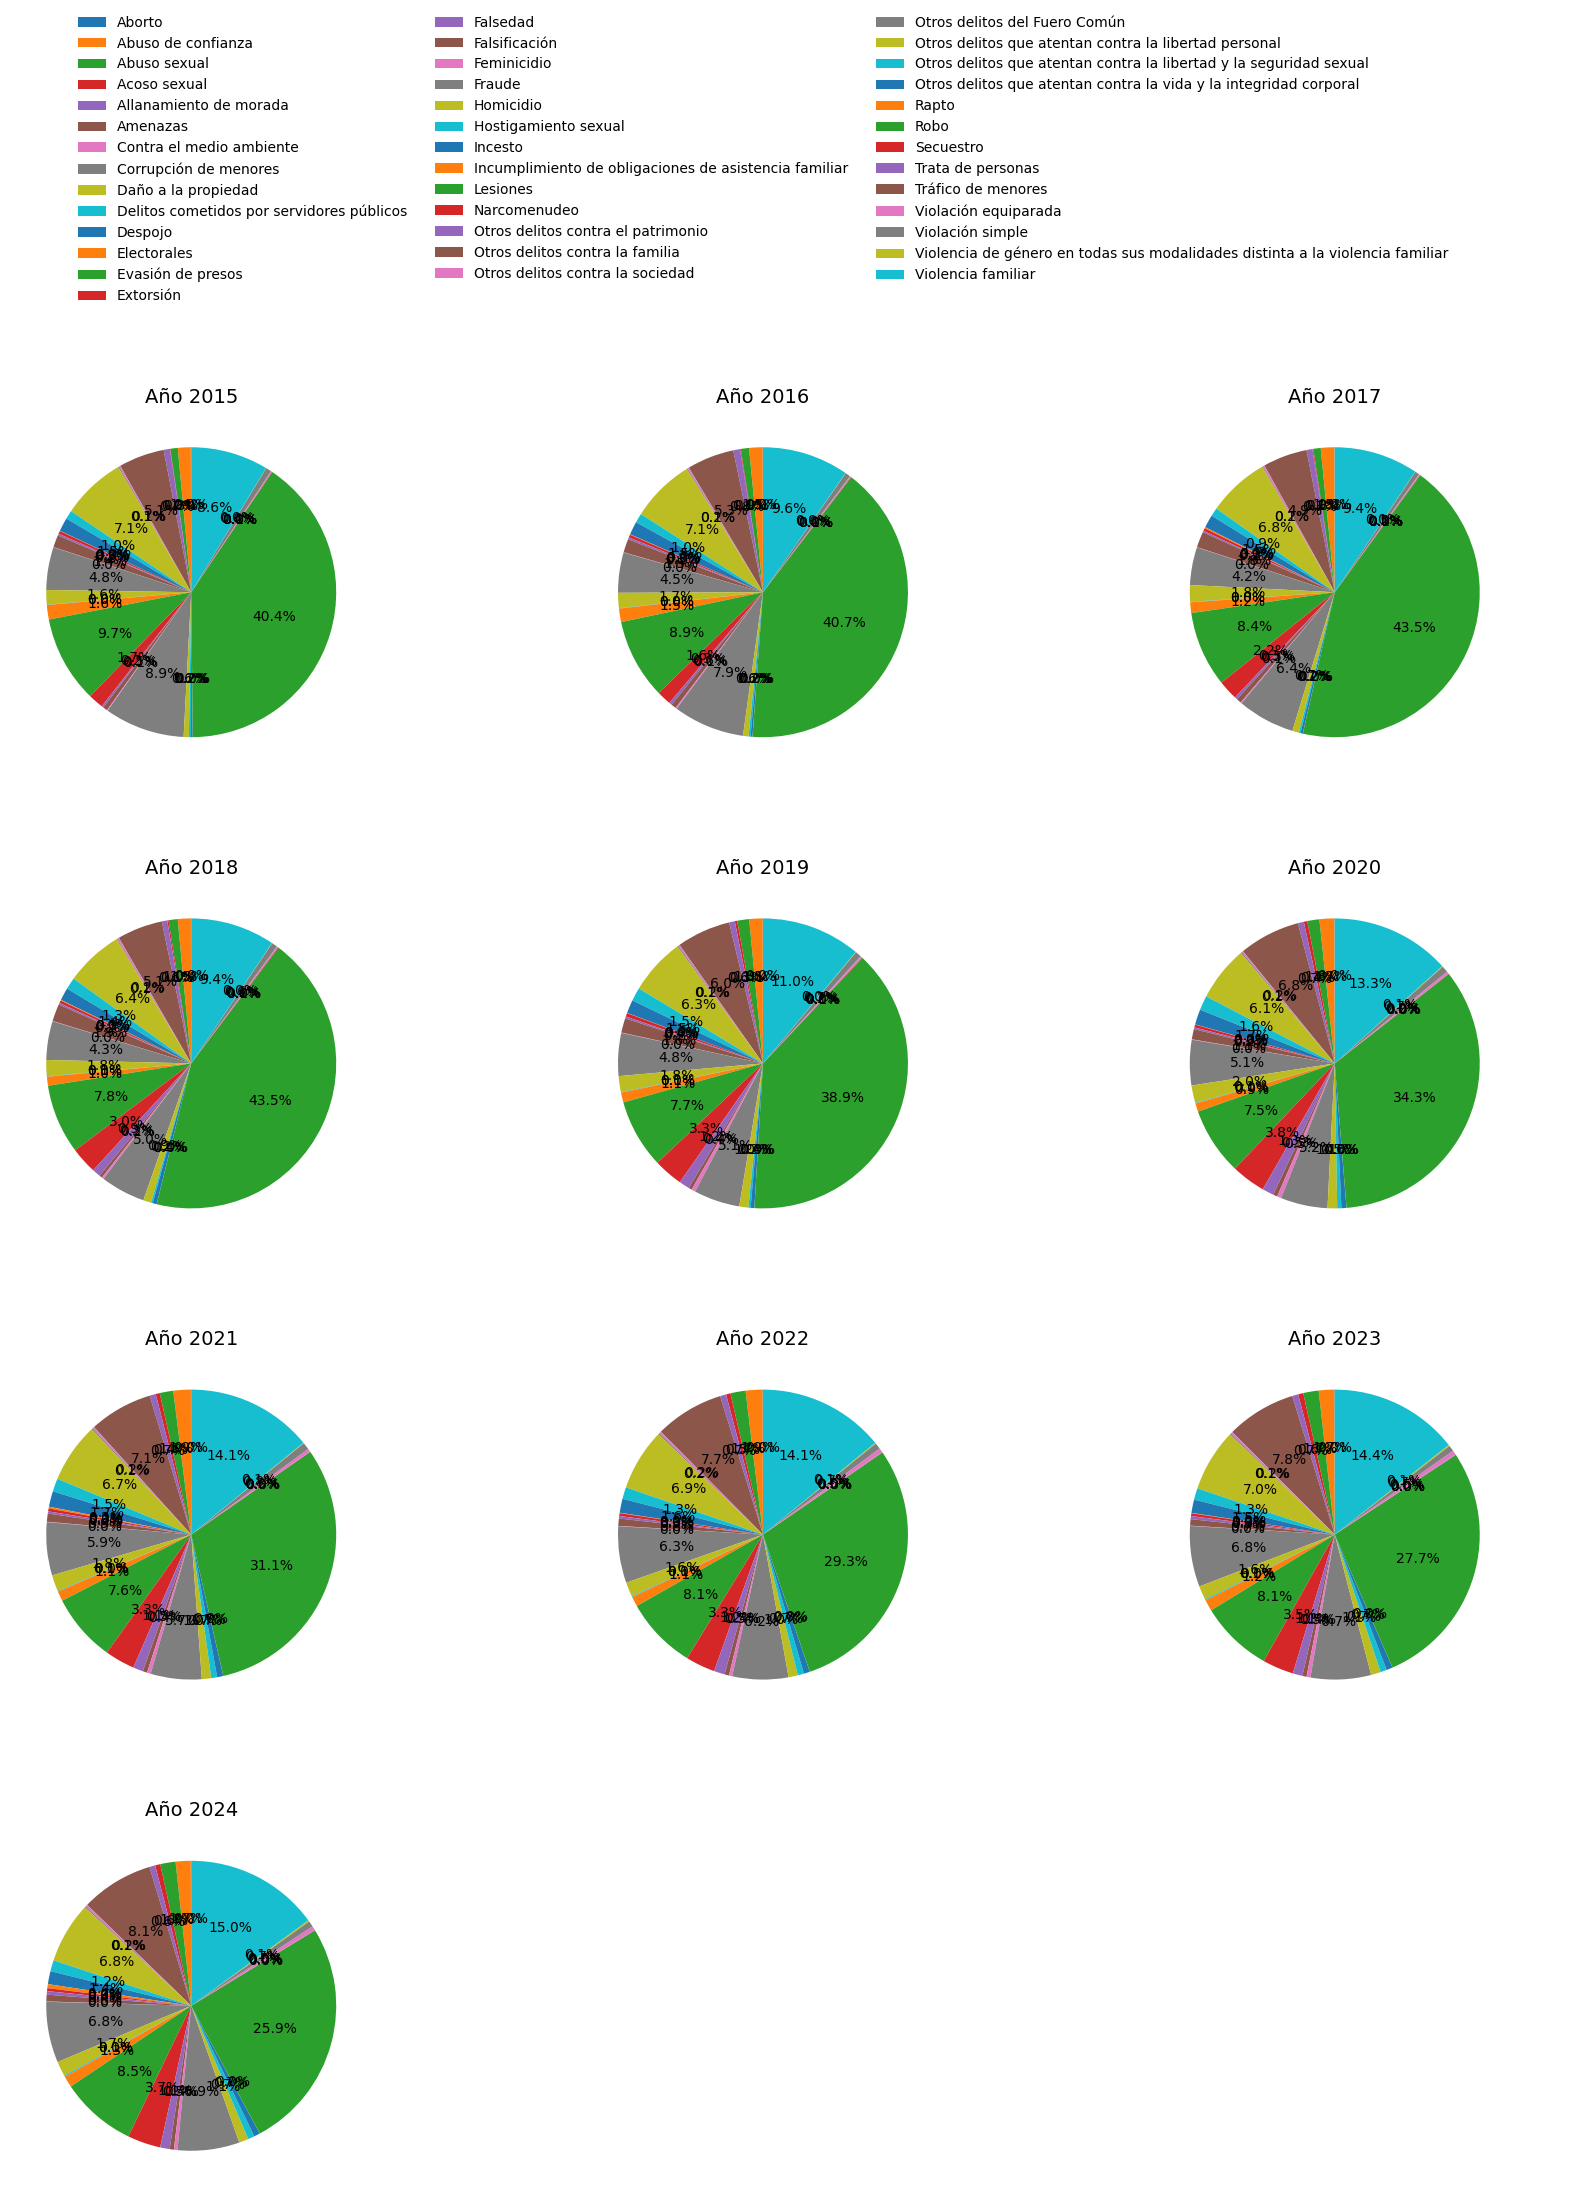

In [115]:
#Ejercicio 3
# Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import math

# --- Leer CSV de delitos ---
df = pd.read_csv('limpieza_datos_y_eda/data/datos_delitos.csv', encoding='ISO-8859-1')

# --- Normalizar columnas ---
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace('á','a')
    .str.replace('é','e')
    .str.replace('í','i')
    .str.replace('ó','o')
    .str.replace('ú','u')
    .str.replace('ñ','n')
    .str.replace(' ','_')
)

# --- Leer población ---
pobs = pd.read_csv('limpieza_datos_y_eda/data/poblacion_entidades_2015.csv', encoding='ISO-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs.columns = ['clave_ent', 'entidad', 'poblacion']

# --- Columnas de meses ---
meses = ['enero','febrero','marzo','abril','mayo','junio',
         'julio','agosto','septiembre','octubre','noviembre','diciembre']
meses = [m for m in meses if m in df.columns]

# --- Total anual por fila ---
df['total_anio'] = df[meses].sum(axis=1)

# --- Agrupar por año, entidad y tipo de delito ---
delitos_por_entidad = df.groupby(['ano','clave_ent','entidad','tipo_de_delito'])['total_anio'].sum().reset_index()

# --- Unir con población ---
delitos_por_entidad = delitos_por_entidad.merge(pobs, on=['clave_ent','entidad'], how='left')

# --- Tasa ---
delitos_por_entidad['tasa_100k'] = (delitos_por_entidad['total_anio'] / delitos_por_entidad['poblacion']) * 100000
anos = sorted(delitos_por_entidad['ano'].unique())
max_por_fila = 3
n_filas = math.ceil(len(anos) / max_por_fila)
n_cols = min(len(anos), max_por_fila)

# --- Crear subplots ---
fig, axes = plt.subplots(n_filas, n_cols, figsize=(6*n_cols, 6*n_filas))
axes = axes.flatten()  

# --- Graficar pastel ---
for ax, ano in zip(axes, anos):
    df_ano = delitos_por_entidad[delitos_por_entidad['ano'] == ano]
    sum_tipo = df_ano.groupby('tipo_de_delito')['tasa_100k'].sum()
    
    ax.pie(sum_tipo, labels=None, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Año {ano}', fontsize=14)

for ax in axes[len(anos):]:
    ax.axis('off')

# --- Leyenda ---
fig.legend(
    labels=sum_tipo.index,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.02),
    fontsize=10,
    ncol=3,
    frameon=False
)

plt.subplots_adjust(top=0.85, left=0.05, right=0.95, hspace=0.3)
plt.show()
